Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
df=pd.read_csv("/Users/chikkapurnachandrarao/Desktop/Anand/HackTriad_Project/Stock_Prediction_and_Forcasting/MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059089,58435200
...,...,...,...,...,...,...,...
7305,2015-03-06,43.000000,43.110001,42.150002,42.360001,36.838905,36248800
7306,2015-03-09,42.189999,43.130001,42.189999,42.849998,37.265045,32108000
7307,2015-03-10,42.349998,42.709999,42.029999,42.029999,36.551922,39159700
7308,2015-03-11,42.310001,42.369999,41.840000,41.980000,36.508427,32215300


Date - The particular date
Open - The opening price of the day
High - The highest price that day
Low - The lowest price of that day
Close - The last price that day had ended with
Adj Close - Modification made to a stock's closing price
Volume - Total number of stocks that are sold

In [3]:
df = df[['Date', 'Close']]

In [4]:
df

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826
3,1986-03-19,0.098090
4,1986-03-20,0.095486
...,...,...
7305,2015-03-06,42.360001
7306,2015-03-09,42.849998
7307,2015-03-10,42.029999
7308,2015-03-11,41.980000


In [5]:
df['Date']

0       1986-03-14
1       1986-03-17
2       1986-03-18
3       1986-03-19
4       1986-03-20
           ...    
7305    2015-03-06
7306    2015-03-09
7307    2015-03-10
7308    2015-03-11
7309    2015-03-12
Name: Date, Length: 7310, dtype: object

In [6]:
def str_to_datetime(string):
    split = string.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object=str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [7]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/7y/9r9njlr95kx7z2d0ttjbhv6c0000gn/T/ipykernel_31707/1876721881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-14
1      1986-03-17
2      1986-03-18
3      1986-03-19
4      1986-03-20
          ...    
7305   2015-03-06
7306   2015-03-09
7307   2015-03-10
7308   2015-03-11
7309   2015-03-12
Name: Date, Length: 7310, dtype: datetime64[ns]

In [8]:
df.index=df.pop('Date')

In [9]:
df

,Close
Date,
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
...,...
2015-03-06,42.360001
2015-03-09,42.849998
2015-03-10,42.029999


In [12]:
scaler=MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [13]:
pickle.dump(scaler,open('scaler.pkl','wb'))

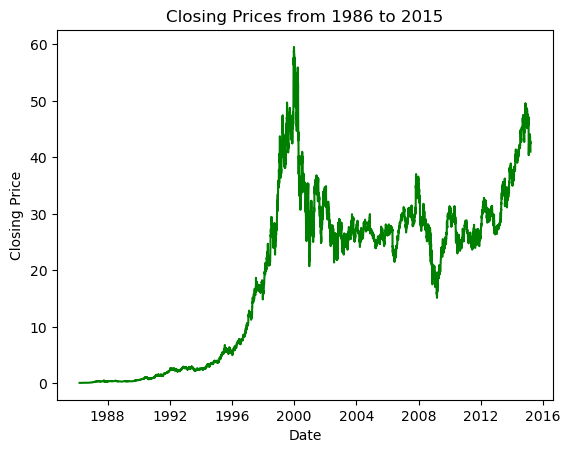

In [10]:
sns.lineplot(x=df.index, y=df['Close'], data=df, color='green')
plt.title("Closing Prices from 1986 to 2015", fontsize='large')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [11]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '1986-03-20'
windowed_df = df_to_windowed_df(df,
                                '1986-03-20',
                                '2015-03-12',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-20,0.102431,0.099826,0.098090,0.095486
1,1986-03-21,0.099826,0.098090,0.095486,0.092882
2,1986-03-24,0.098090,0.095486,0.092882,0.090278
3,1986-03-25,0.095486,0.092882,0.090278,0.092014
4,1986-03-26,0.092882,0.090278,0.092014,0.094618
...,...,...,...,...,...
7301,2015-03-06,43.279999,43.060001,43.110001,42.360001
7302,2015-03-09,43.060001,43.110001,42.360001,42.849998
7303,2015-03-10,43.110001,42.360001,42.849998,42.029999
7304,2015-03-11,42.360001,42.849998,42.029999,41.980000


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((7306,), (7306, 3, 1), (7306,))

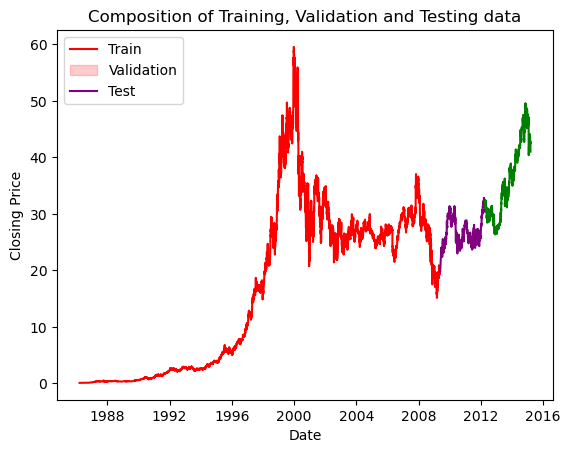

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

sns.lineplot(x=dates_train, y=y_train, color='red')
sns.lineplot(x=dates_val, y=y_val, color='purple')
sns.lineplot(x=dates_test, y=y_test, color='green')

plt.title('Composition of Training, Validation and Testing data')
plt.legend(['Train', 'Validation', 'Test'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Model Building

LSMT

In [15]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70)

Epoch 1/70
183/183 [==============================] - 1s 2ms/step - loss: 111.1771 - mean_absolute_error: 5.0110 - val_loss: 0.1467 - val_mean_absolute_error: 0.2861
Epoch 2/70
183/183 [==============================] - 0s 1ms/step - loss: 0.4014 - mean_absolute_error: 0.3241 - val_loss: 0.2959 - val_mean_absolute_error: 0.4467
Epoch 3/70
183/183 [==============================] - 0s 1ms/step - loss: 0.3852 - mean_absolute_error: 0.3394 - val_loss: 0.6456 - val_mean_absolute_error: 0.7210
Epoch 4/70
183/183 [==============================] - 0s 1ms/step - loss: 0.3414 - mean_absolute_error: 0.3170 - val_loss: 0.3492 - val_mean_absolute_error: 0.4901
Epoch 5/70
183/183 [==============================] - 0s 1ms/step - loss: 0.3457 - mean_absolute_error: 0.3213 - val_loss: 0.1546 - val_mean_absolute_error: 0.2932
Epoch 6/70
183/183 [==============================] - 0s 1ms/step - loss: 0.3776 - mean_absolute_error: 0.3440 - val_loss: 0.4367 - val_mean_absolute_error: 0.5716
Epoch 7/70
183

183/183 [==============================] - 0s 469us/step


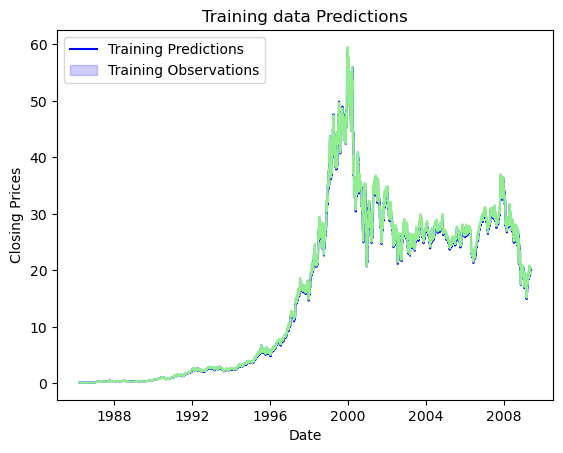

In [22]:
train_predictions = model.predict(X_train).flatten()

sns.lineplot(x=dates_train, y=train_predictions, color='blue')
sns.lineplot(x=dates_train, y=y_train, color='lightgreen')
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('Training data Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

23/23 [==============================] - 0s 766us/step


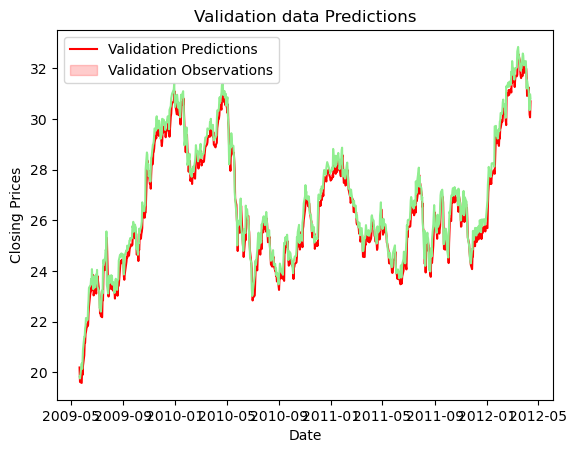

In [23]:
val_predictions = model.predict(X_val).flatten()

sns.lineplot(x=dates_val, y=val_predictions, color='red')
sns.lineplot(x=dates_val, y=y_val, color='lightgreen')
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('Validation data Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

23/23 [==============================] - 0s 759us/step


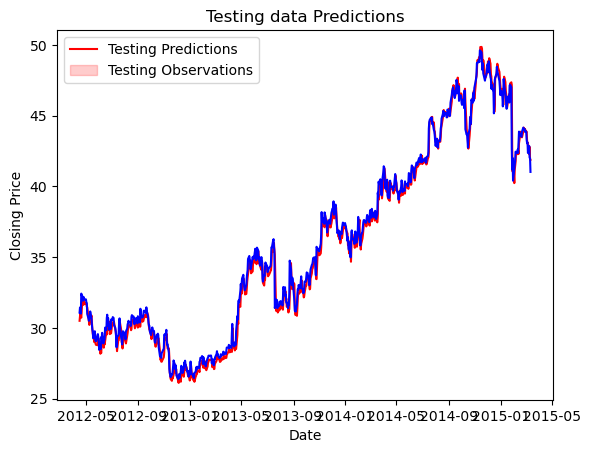

In [24]:
test_predictions = model.predict(X_test).flatten()

sns.lineplot(x=dates_test, y=test_predictions, color='red')
sns.lineplot(x=dates_test, y=y_test, color='blue')
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('Testing data Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [19]:
pickle.dump(model,open('lsmt.pkl','wb'))